In [78]:
## Let's try to figure out who the shortest, heaviest baseball players are.

In [91]:
import pybaseball as pb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [80]:
df = pd.read_csv("lahman/core/people.csv")

In [81]:
df['kg'] = df['weight'] * 0.453592
df['meters'] = df['height'] * 0.0254

In [82]:
df['BMI'] = df['kg'] / df['meters'] ** 2

In [83]:
df.loc[df['nameLast'] == 'Gaedel'] # Check for Gaedel.

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,height,bats,throws,debut,finalGame,retroID,bbrefID,kg,meters,BMI
6210,gaedeed01,1925.0,6.0,8.0,USA,IL,Chicago,1961.0,6.0,18.0,...,43.0,R,L,1951-08-19,1951-08-19,gaede101,gaedeed01,29.48348,1.0922,24.715784


In [84]:
df.loc[df['bbrefID'] == 'colonba01'] # Check for Bartolo.

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,height,bats,throws,debut,finalGame,retroID,bbrefID,kg,meters,BMI
3516,colonba01,1973.0,5.0,24.0,D.R.,Puerto Plata,Altamira,NaN,NaN,NaN,...,71.0,R,R,1997-04-04,2018-09-22,colob001,colonba01,129.27372,1.8034,39.748992


In [85]:
df.sort_values(by=["height", "BMI"], ascending=False)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,height,bats,throws,debut,finalGame,retroID,bbrefID,kg,meters,BMI
15045,rauchjo01,1978.0,9.0,27.0,USA,KY,Louisville,NaN,NaN,NaN,...,83.0,R,R,2002-04-02,2013-05-17,raucj001,rauchjo01,131.54168,2.1082,29.596460
16949,siscoan01,1983.0,1.0,13.0,USA,CO,Steamboat Springs,NaN,NaN,NaN,...,82.0,L,L,2005-04-04,2007-05-27,sisca001,siscoan01,122.46984,2.0828,28.231504
17014,slegeaa01,1992.0,9.0,4.0,USA,CA,Long Beach,NaN,NaN,NaN,...,82.0,R,R,2017-08-17,2021-08-19,slega001,slegeaa01,117.93392,2.0828,27.185893
20222,youngch03,1979.0,5.0,25.0,USA,TX,Dallas,NaN,NaN,NaN,...,82.0,R,R,2004-08-24,2017-06-17,younc003,youngch03,115.66596,2.0828,26.663087
8228,hillmer01,1966.0,4.0,27.0,USA,IN,Gary,NaN,NaN,NaN,...,82.0,L,L,1992-05-18,1994-05-30,hille001,hillmer01,106.59412,2.0828,24.571864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20255,youngni99,1840.0,9.0,12.0,USA,NY,Amsterdam,1916.0,10.0,31.0,...,NaN,NaN,NaN,NaN,NaN,younn801,youngni99,NaN,NaN,NaN
20281,zahnefr01,1870.0,6.0,5.0,USA,KY,Louisville,1900.0,7.0,24.0,...,NaN,NaN,NaN,1894-07-23,1895-08-05,zahnf101,zahnefr01,NaN,NaN,NaN
20305,zay01,NaN,NaN,NaN,USA,PA,Pittsburgh,NaN,NaN,NaN,...,NaN,NaN,NaN,1886-10-07,1886-10-07,zay-u101,zay01,NaN,NaN,NaN
20323,zieglch01,1875.0,1.0,13.0,USA,OH,Canton,1904.0,4.0,18.0,...,NaN,NaN,R,1899-09-23,1900-06-06,ziegc101,zieglch01,NaN,NaN,NaN


In [90]:
# group data together by player and season, then calculate pitches per plate apperance
df_plot = (df.groupby(["nameLast", "BMI"])[["weight","height"]]
           .sum()
           .reset_index()
           .assign(bmi=lambda x: round(x.BMI, 2)))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(50, 200, 'Yankees Legend Eddie Gaedel')

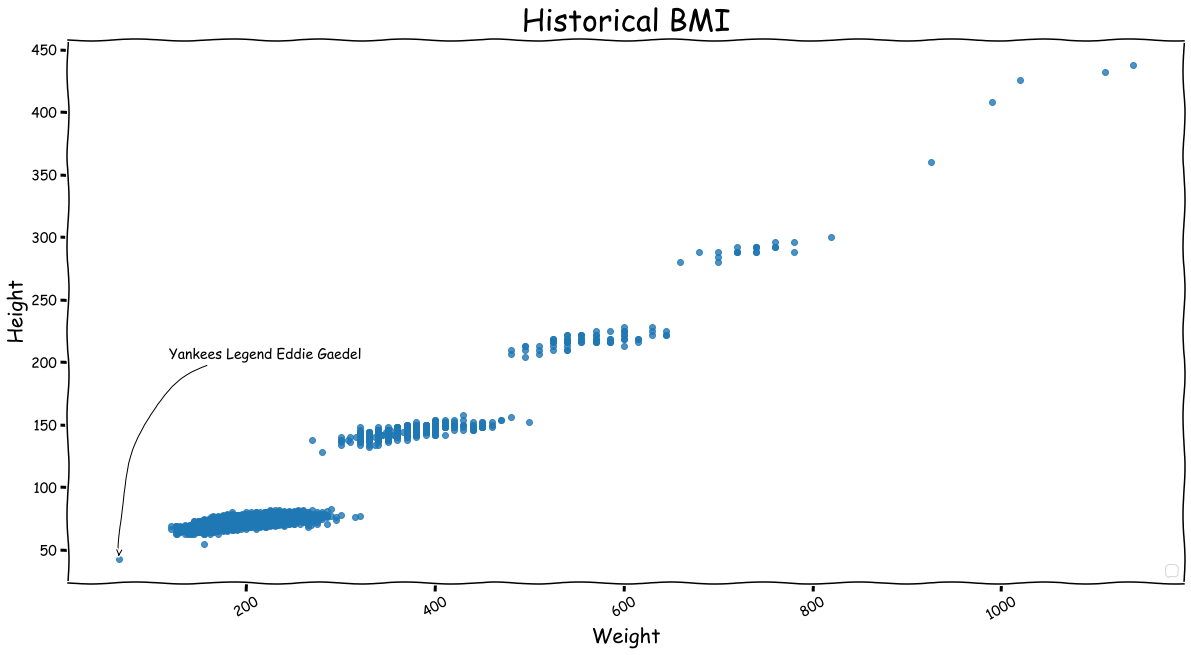

In [88]:
#plot

fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(df_plot.weight, df_plot.height, alpha=0.8)
ax.scatter()
plt.xticks(rotation=30)
plt.ylabel("Height", size=20)
plt.xlabel("Weight", size=20)
plt.title("Historical BMI", size=30)
plt.legend(loc="lower right")

# Eddie Gaedel
gaedel = df_plot.query("nameLast == 'Gaedel'").iloc[0]
ax.annotate("Yankees Legend Eddie Gaedel", 
            (gaedel.weight, gaedel.height),
            xytext=(50, 200),
            textcoords="offset pixels",
            arrowprops={"arrowstyle":"->","connectionstyle" : "angle3,angleA=0,angleB=90"}
           )

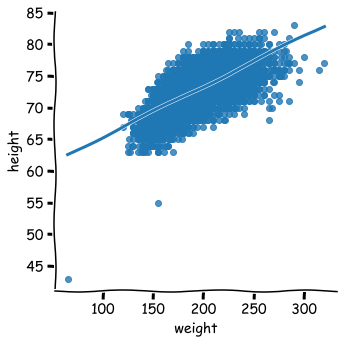

In [93]:
sns.lmplot(x="weight", y="height", data=df)

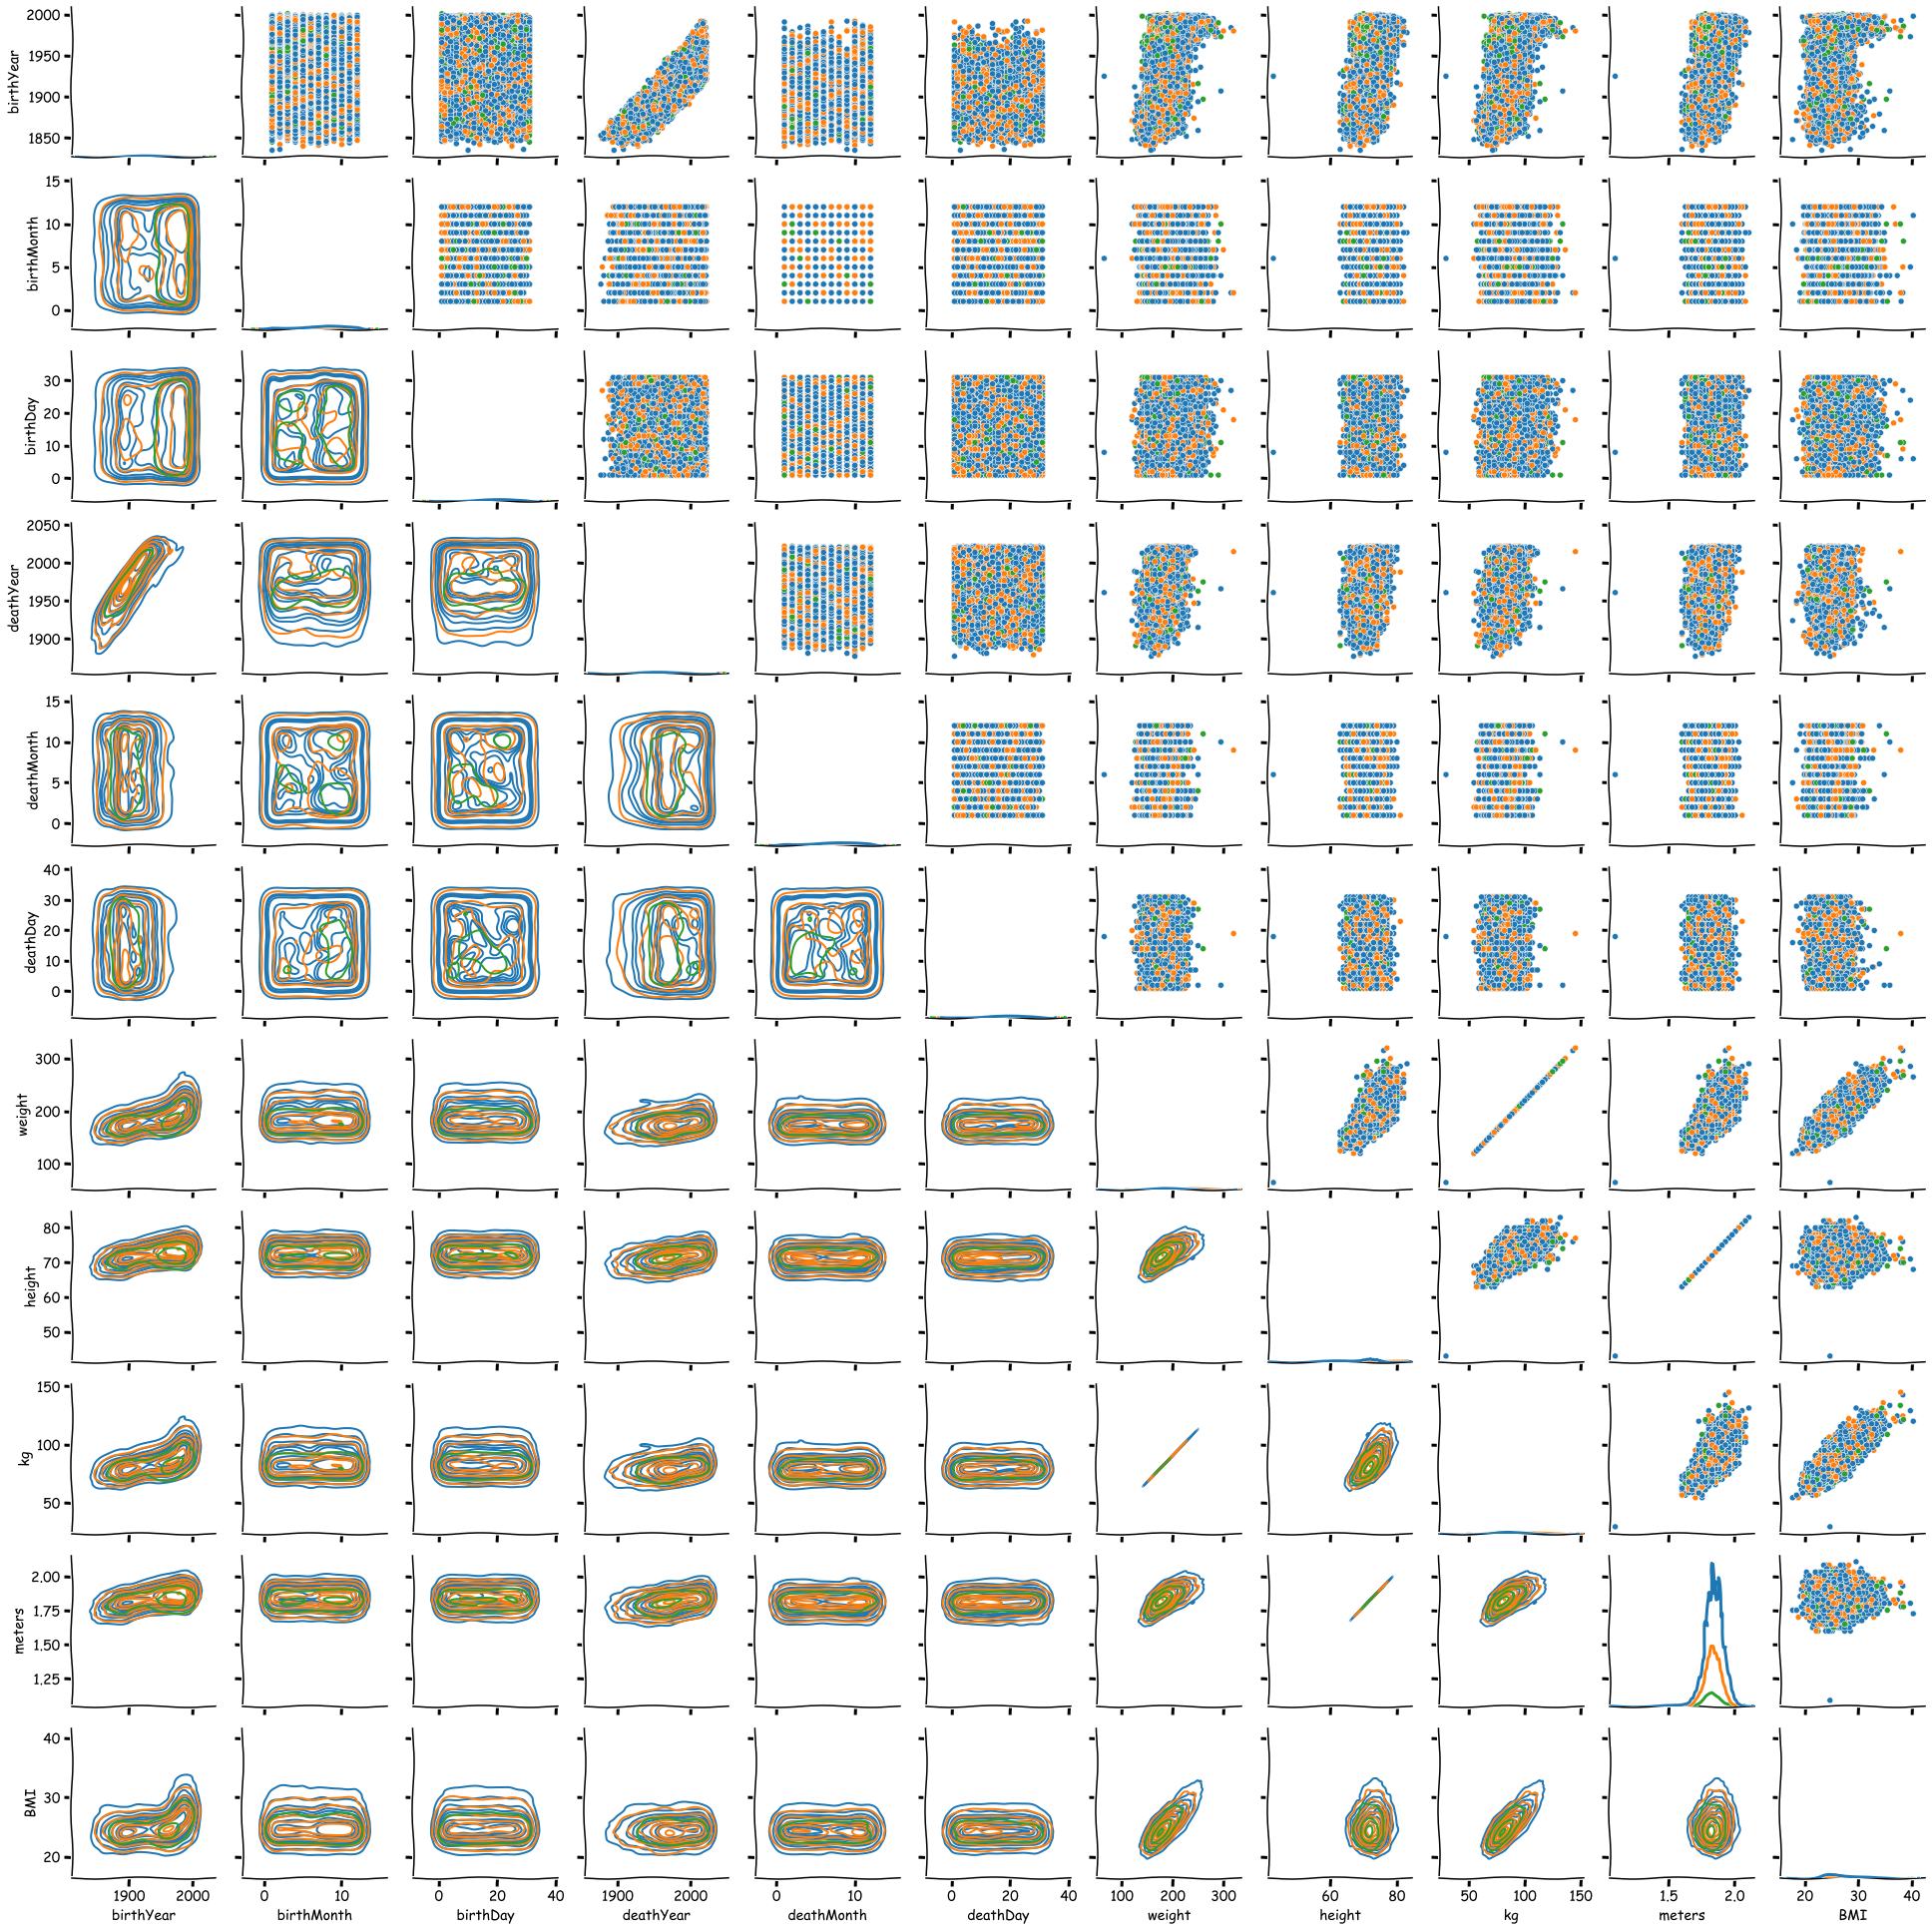

In [98]:
g = sns.PairGrid(df, hue="bats")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=True)